### Random Walk (15 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a unit step in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (1,0), (-1,0), (0,1) or (0,-1) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-4,-4), (-4,4), (4,4), (4,-4). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

averagestepout: 20.0


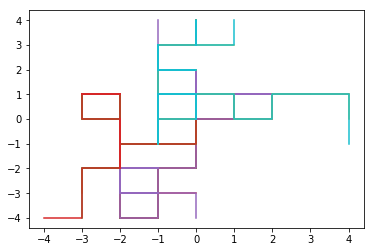

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class walker():
    
    
    def getDirection(self):
        direction=np.random.randint(1,5)
        if direction==1:
            return [0,1]
        elif direction==2:
            return [0,-1]
        elif direction==3:
            return [1,0]
        else:
            return [-1,0]
    
    
    def walk(self,current_pos,a,b):
        final_pos = [current_pos[0]+a,current_pos[1]+b]
            
        return final_pos


k=[]
for i in range(1,6):
    w=walker()
    current_pos=(0,0)
    listofx=[]
    listofy=[]
    totallist=[]
    stepout=0
    while(abs(current_pos[0])<=4 and abs(current_pos[1])<=4):
        a,b=w.getDirection()
        c=current_pos
        current_pos=w.walk(c,a,b) 
        totallist.append(c)
        listofx.append(c[0])
        listofy.append(c[1])
        stepout=stepout+1
    
        plt.plot(listofx, listofy)
    k.append(stepout)


print("averagestepout:",np.mean(k))
        
           
        

### Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from an _exponential distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is exponential distribution. Call this function ``inverseCDFExponential()``. Note that you are not allowed to use any routines from ``np.random`` package here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\lambda$.
3. Apply the ``inverseCDFExponential()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

Using the above implementation, generate a sample of size 100 from an  Exponential ($\lambda=4$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

Mean: 0.255710133198
Variance: 0.0735766351504


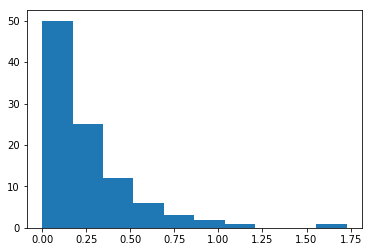

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def inverseCDFExponential(λ):
    data=np.linspace(0.001,1,100)
    for i in range(0, len(data)):
        data[i] = (-1/λ) * np.log(data[i])

    return(data)

plt.hist(inverseCDFExponential(4))

m=np.mean(inverseCDFExponential(4))
print("Mean:",m)
v=np.var(inverseCDFExponential(4))
print("Variance:",v)